In [1]:
import datacube
#dc = datacube.Datacube(env='sentinel2betatmp', config='/home/547/aw3463/.sent2.conf')
dc = datacube.Datacube()
query={'time': ('2017-01-01', '2017-12-31'),
 'lat': (-34.3950287155991, -34.374146904809064),
 'lon': (139.58977457436085, 139.6109943440065),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
b_names = ['nbar_coastal_aerosol', 'nbar_blue', 'nbar_green', 'nbar_red', 'nbar_red_edge_1', 'nbar_red_edge_2', 'nbar_red_edge_3', 'nbar_nir_1', 'nbar_nir_2', 'nbar_swir_2', 'nbar_swir_3']
#sat_array = dc.load(product='s2b_ard_granule', measurements=b_names, **query)
sat_array = dc.load(product='ls8_nbar_scene', **query)
sat_array.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)


<xarray.Dataset>
Dimensions:          (time: 46, x: 84, y: 98)
Coordinates:
  * time             (time) datetime64[ns] 2017-01-02T00:27:35 ...
  * y                (y) float64 -3.773e+06 -3.773e+06 -3.773e+06 -3.773e+06 ...
  * x                (x) float64 6.945e+05 6.945e+05 6.946e+05 6.946e+05 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 649 664 682 671 678 703 704 697 706 ...
    blue             (time, y, x) int16 653 678 692 683 694 720 724 716 719 ...
    green            (time, y, x) int16 856 879 903 892 915 950 953 944 949 ...
    red              (time, y, x) int16 1103 1146 1157 1128 1160 1223 1239 ...
    nir              (time, y, x) int16 1824 1887 1939 1972 2045 2043 1998 ...
    swir1            (time, y, x) int16 2798 2832 2823 2760 2796 2923 2996 ...
    swir2            (time, y, x) int16 2282 2311 2311 2237 2272 2388 2444 ...
Attributes:
    crs:      EPSG:3577

In [2]:
durf = 100*sat_array.groupby('time').std()/sat_array.groupby('time').mean()

In [3]:
spee = durf.to_dataframe()


In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
spee.hist(ax=axes)

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff07df8be48>,
      dtype=object)

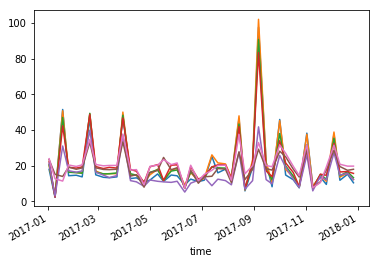

In [5]:
spee.plot(legend=False)


In [6]:
#query={'time': ('2018-02-05', '2018-02-15'),
# 'lat': (-30.595141582265763, -30.573900084400902),
# 'lon': (115.14502132590322, 115.16618234076345),
# 'output_crs': 'EPSG:3577',
# 'resampling': 'bilinear',
# 'resolution': (-25.0, 25.0)}
#sat_array2 = dc.load(product='ls8_nbar_scene', **query)
#sat_array2.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)
#sat_array2

In [7]:
import DEAPlotting
#DEAPlotting.three_band_image(sat_array2, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [8]:
query={'time': ('2017-01-01', '2017-12-31'),
 'lat': (-34.3950287155991, -34.374146904809064),
 'lon': (139.58977457436085, 139.6109943440065),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
data = dc.load(product='ls8_nbart_geomedian_annual', **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 84, y: 98)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01
  * y        (y) float64 -3.773e+06 -3.773e+06 -3.773e+06 -3.773e+06 ...
  * x        (x) float64 6.945e+05 6.945e+05 6.946e+05 6.946e+05 6.946e+05 ...
Data variables:
    blue     (time, y, x) int16 592 599 644 638 610 625 629 627 645 668 687 ...
    green    (time, y, x) int16 798 815 873 852 829 852 855 851 875 909 939 ...
    red      (time, y, x) int16 993 1031 1104 1064 1034 1073 1083 1088 1126 ...
    nir      (time, y, x) int16 2080 2144 2207 2120 2133 2188 2129 2151 2212 ...
    swir1    (time, y, x) int16 2795 2795 2895 2800 2637 2689 2799 2843 2912 ...
    swir2    (time, y, x) int16 2070 2071 2172 2103 1976 2011 2107 2147 2211 ...
Attributes:
    crs:      EPSG:3577

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff07d67a470>)

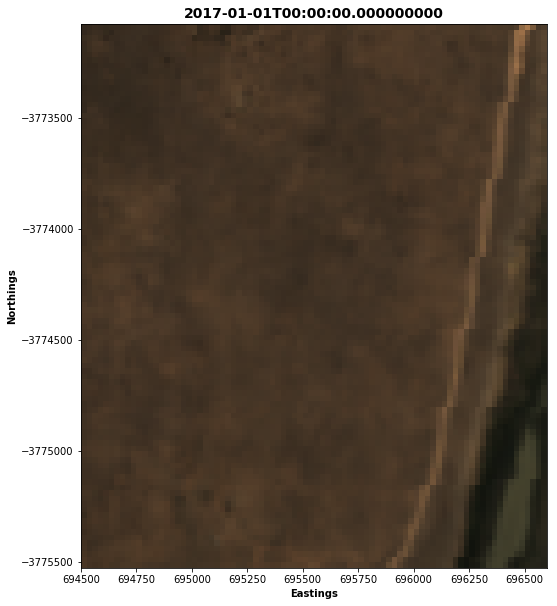

In [9]:
DEAPlotting.three_band_image(data, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [10]:
del sat_array['coastal_aerosol']

In [11]:
norm_diffo = 100*(sat_array - data.squeeze(dim='time'))/data.squeeze(dim='time')
diffo = sat_array - data.squeeze(dim='time')

In [12]:
diffo

<xarray.Dataset>
Dimensions:  (time: 46, x: 84, y: 98)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-02T00:27:35 2017-01-09T00:33:44 ...
  * y        (y) float64 -3.773e+06 -3.773e+06 -3.773e+06 -3.773e+06 ...
  * x        (x) float64 6.945e+05 6.945e+05 6.946e+05 6.946e+05 6.946e+05 ...
Data variables:
    blue     (time, y, x) int16 61 79 48 45 84 95 95 89 74 62 58 53 64 71 74 ...
    green    (time, y, x) int16 58 64 30 40 86 98 98 93 74 51 37 39 60 72 69 ...
    red      (time, y, x) int16 110 115 53 64 126 150 156 144 112 84 70 70 ...
    nir      (time, y, x) int16 -256 -257 -268 -148 -88 -145 -131 -178 -207 ...
    swir1    (time, y, x) int16 3 37 -72 -40 159 234 197 162 96 35 32 54 110 ...
    swir2    (time, y, x) int16 212 240 139 134 296 377 337 315 263 222 197 ...

xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

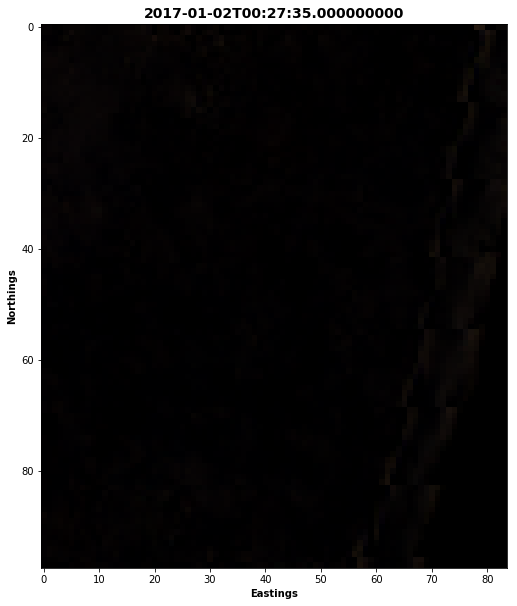

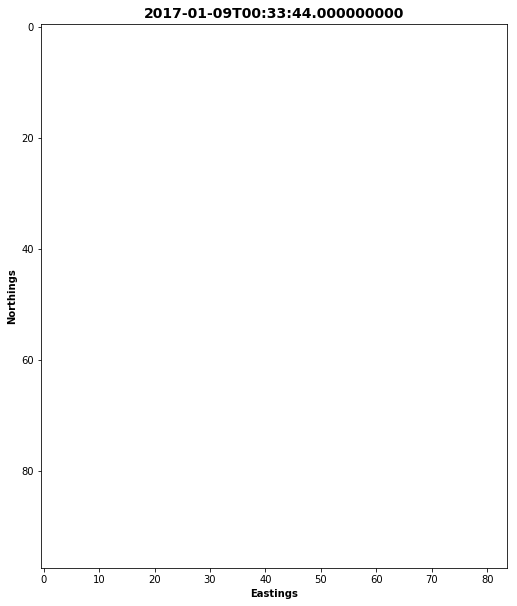

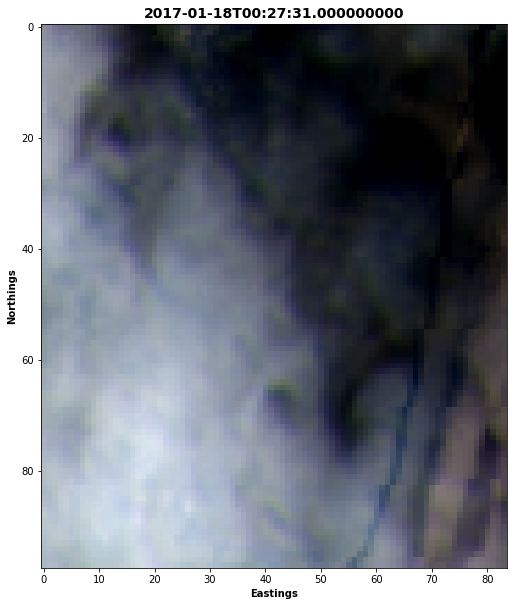

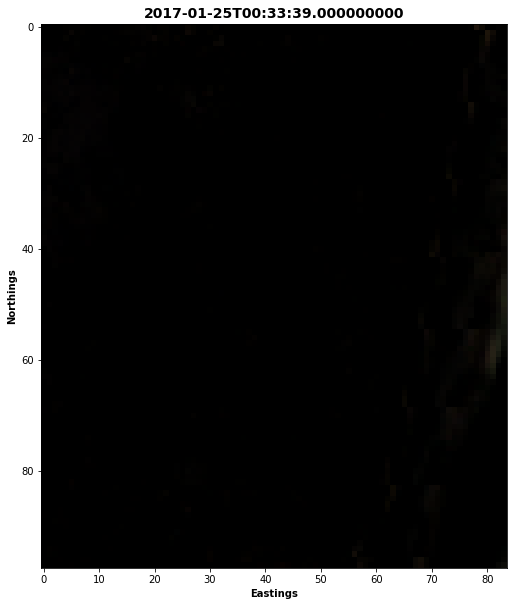

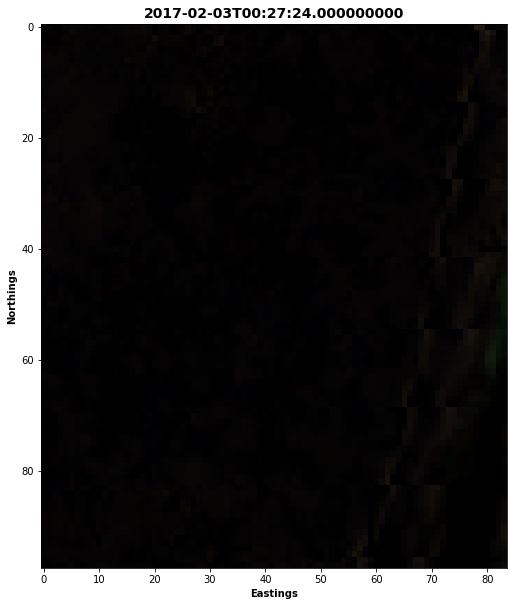

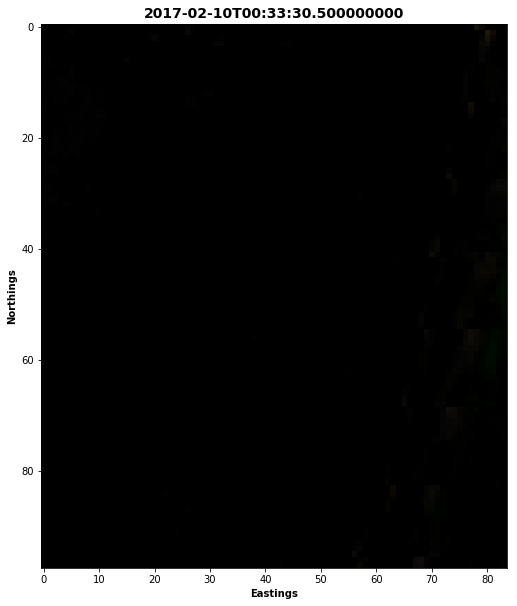

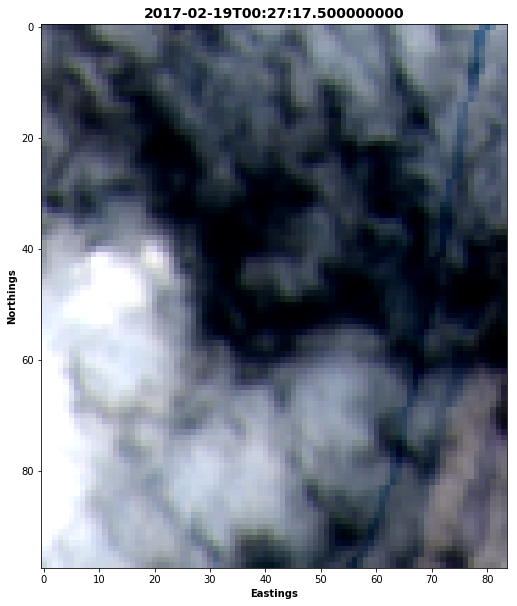

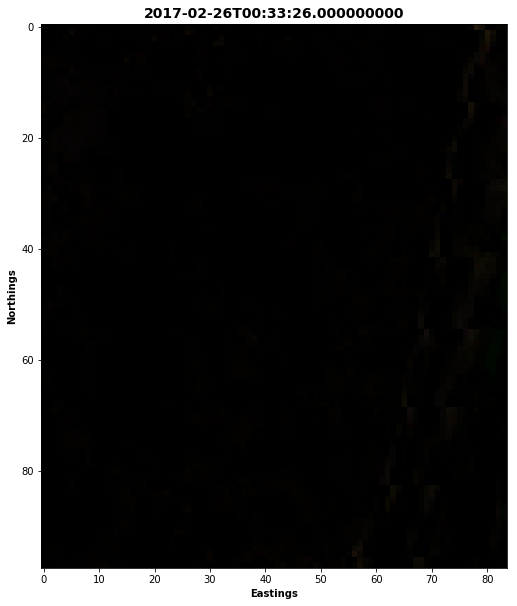

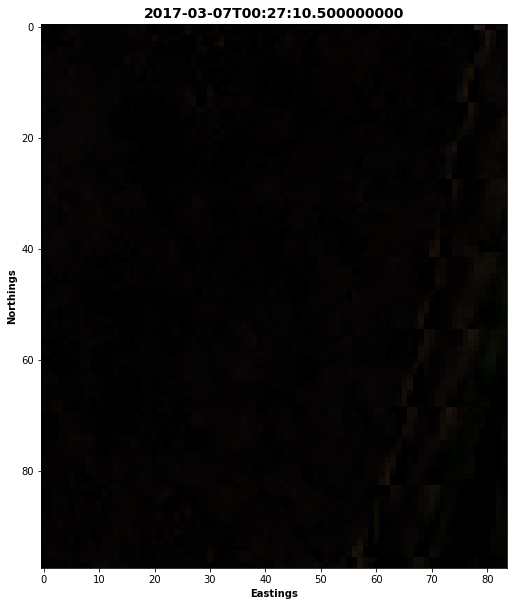

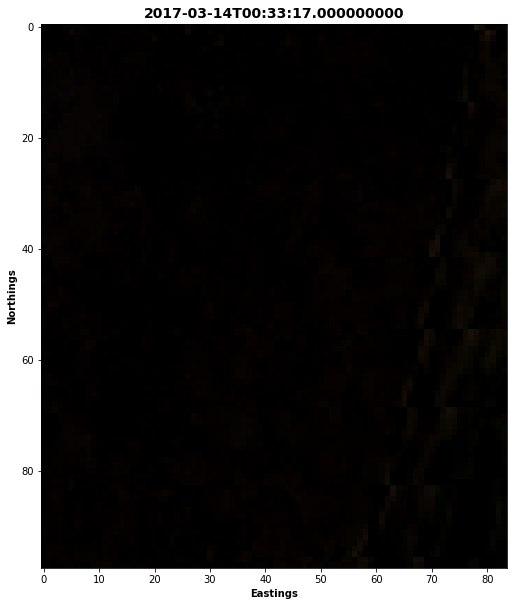

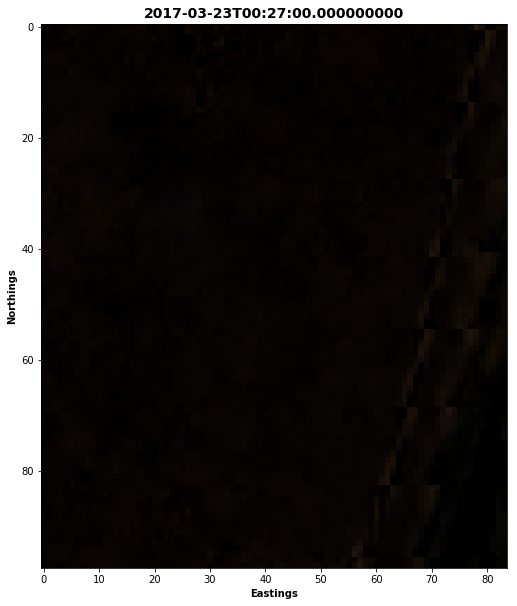

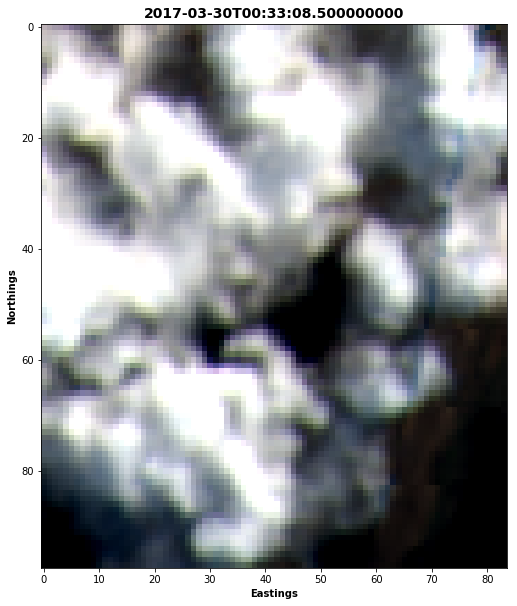

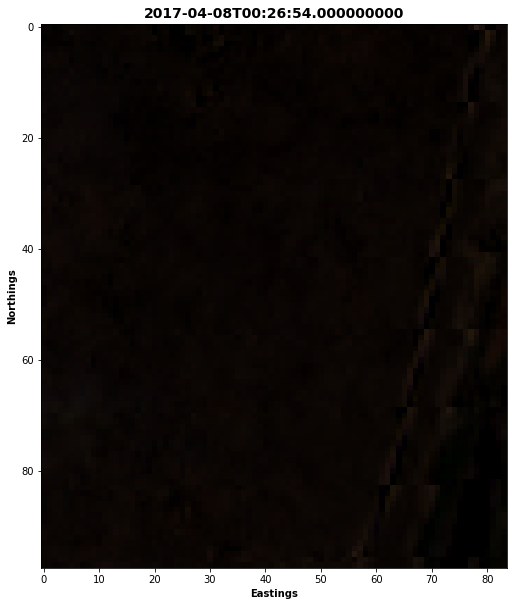

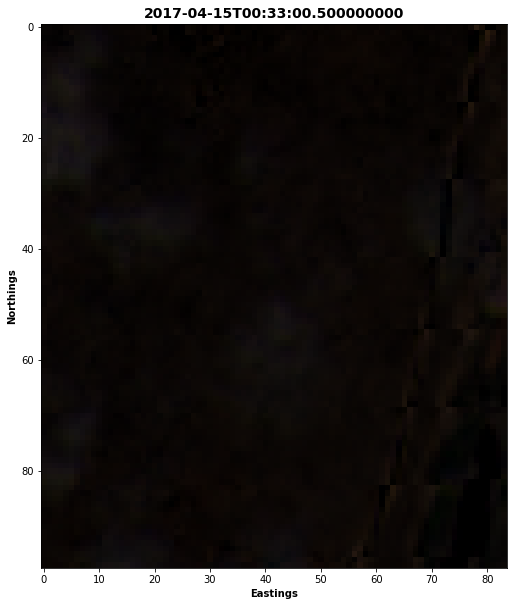

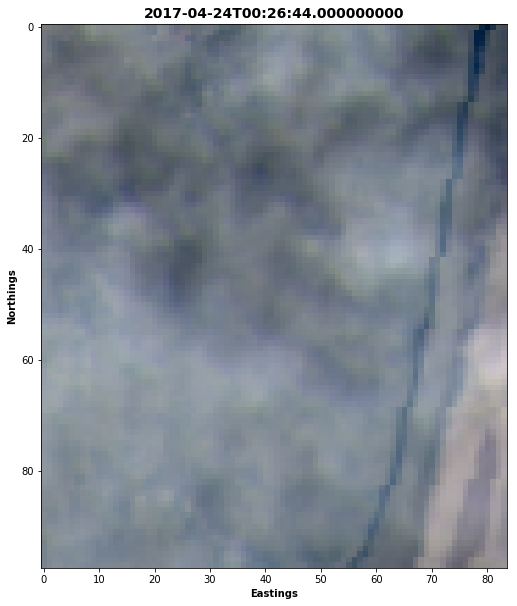

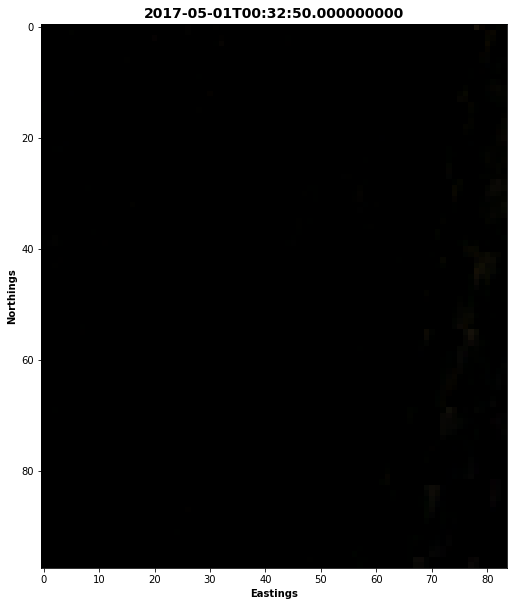

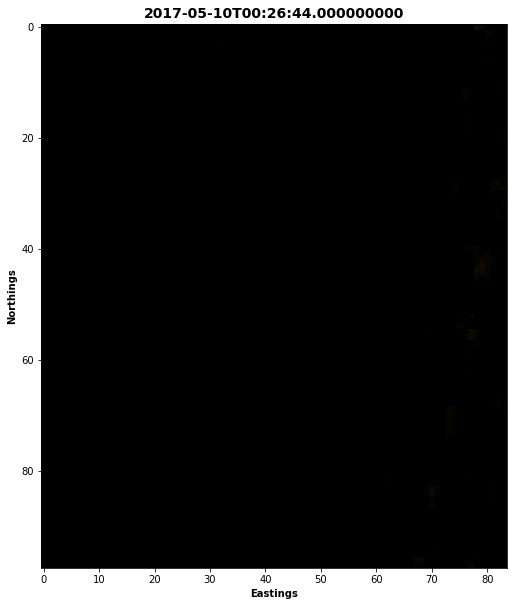

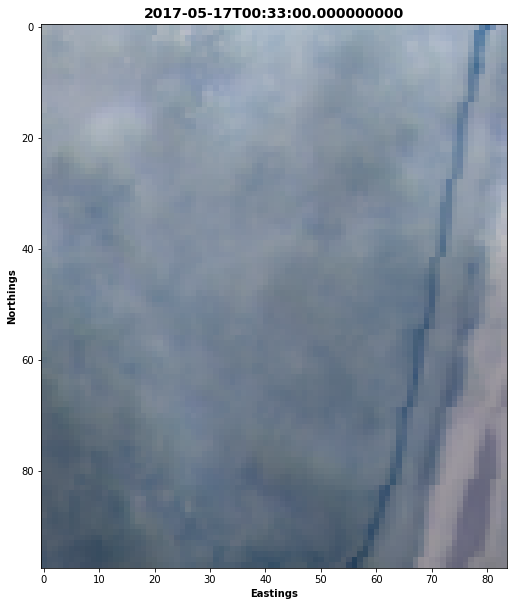

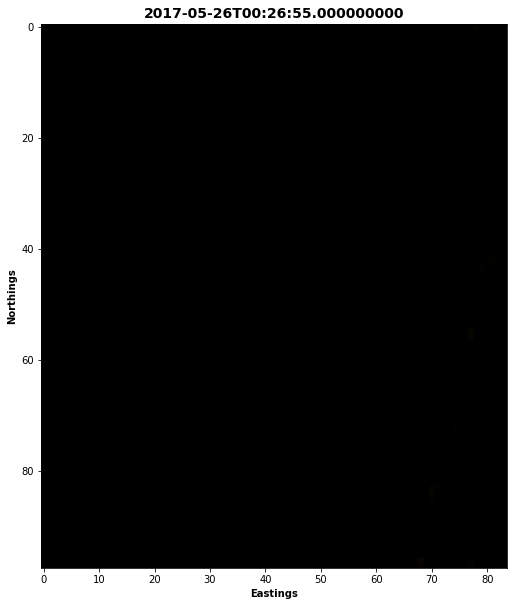

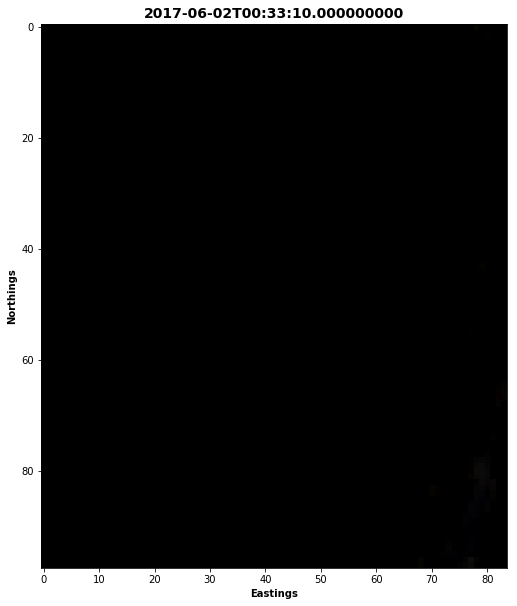

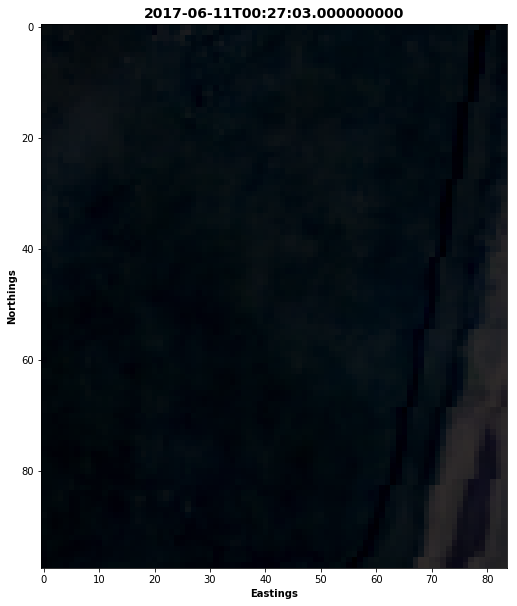

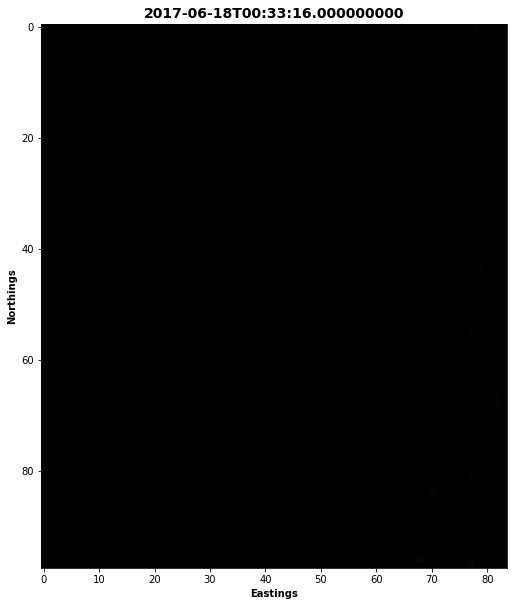

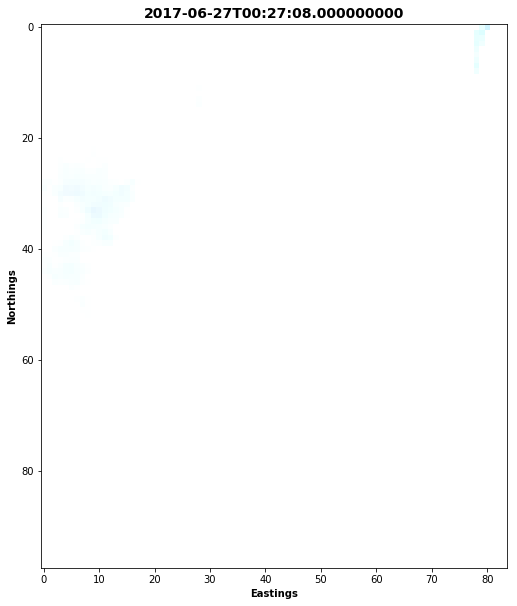

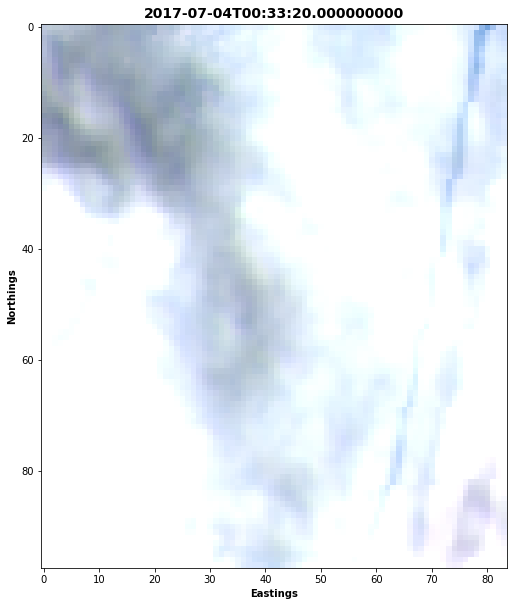

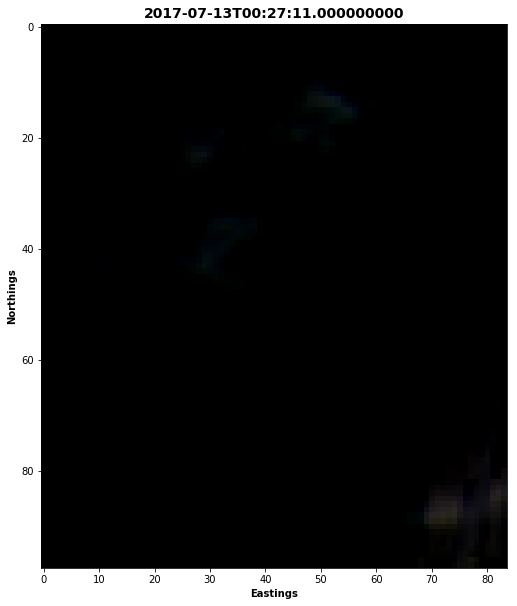

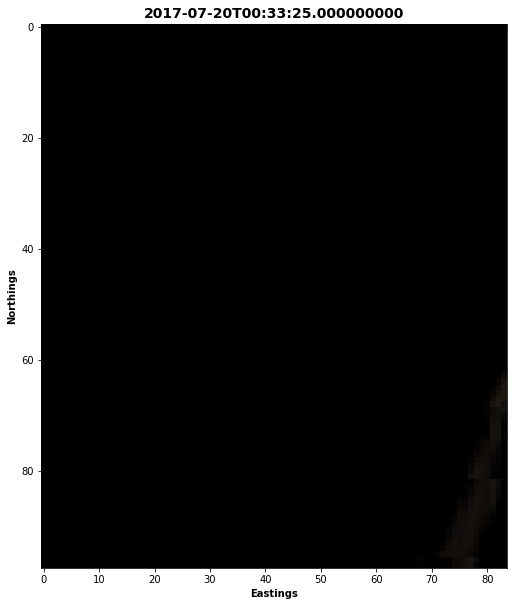

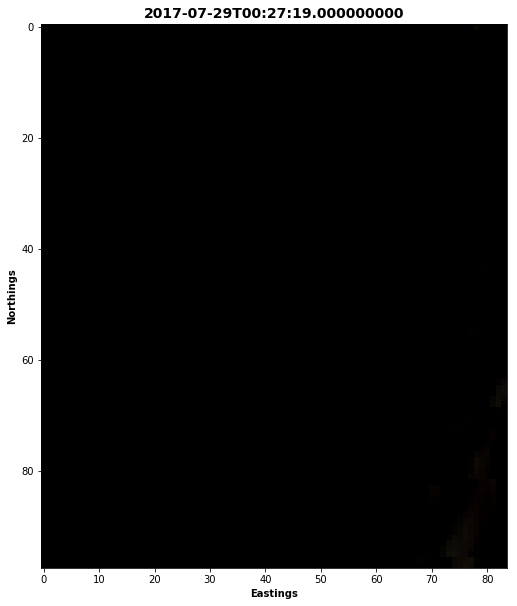

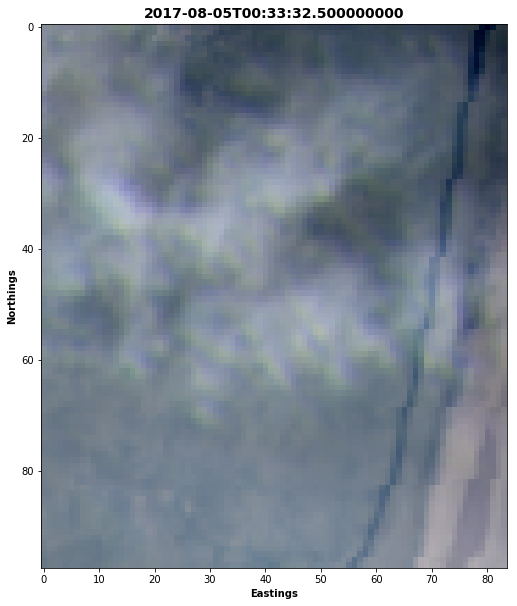

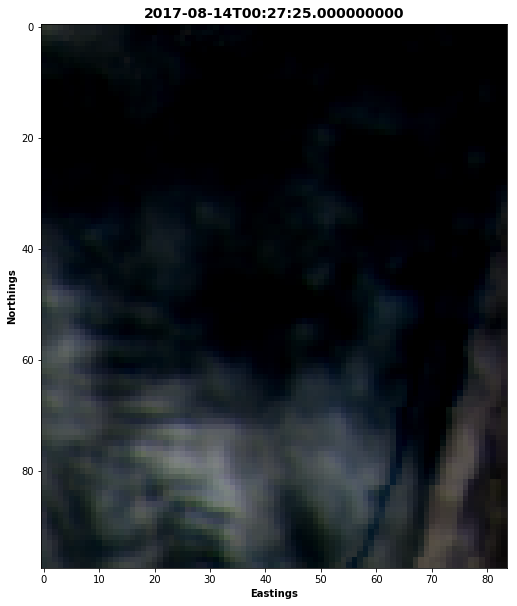

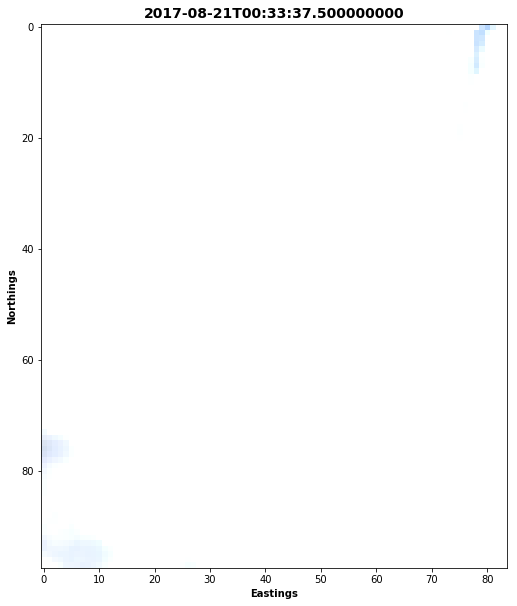

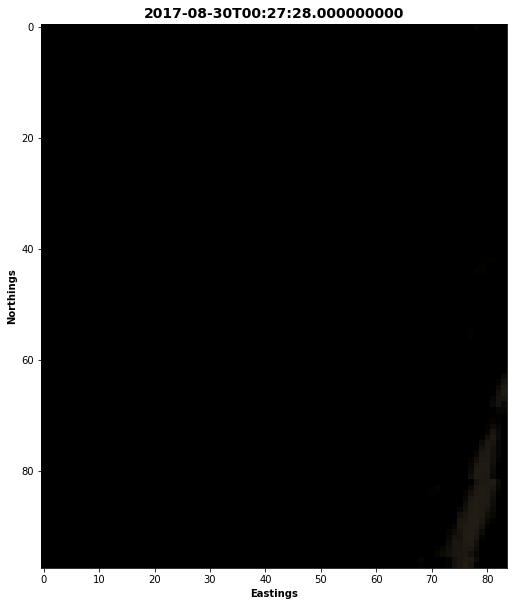

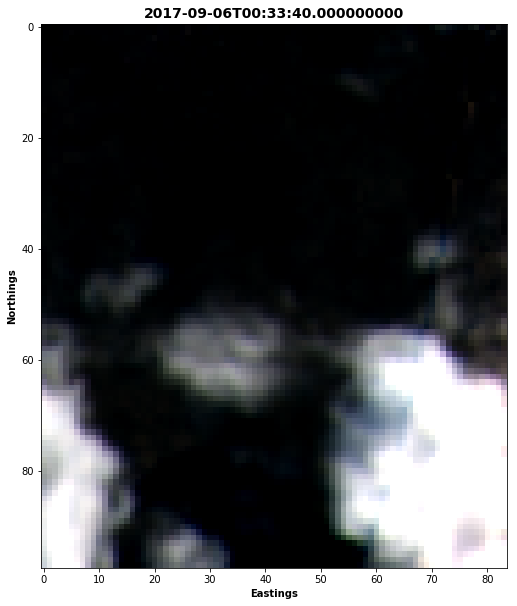

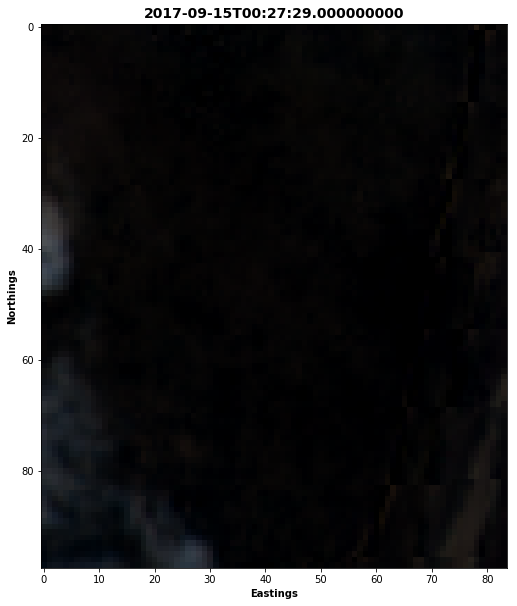

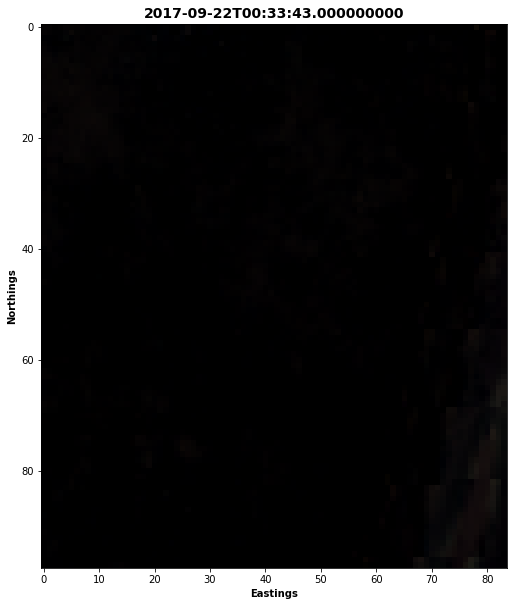

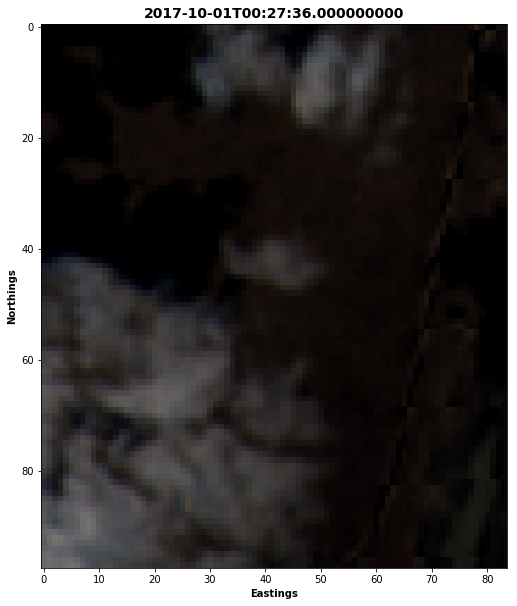

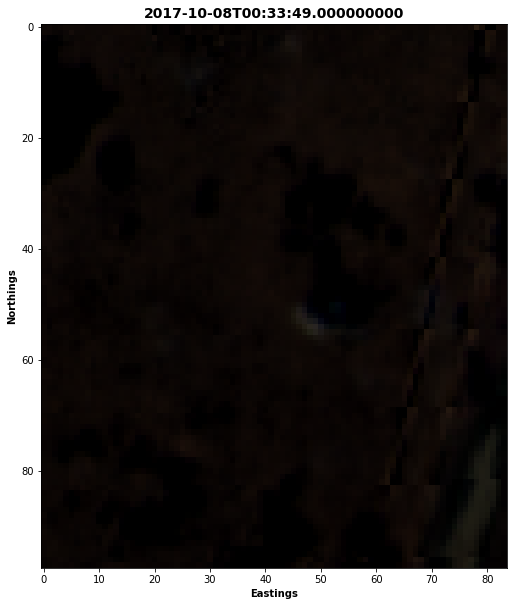

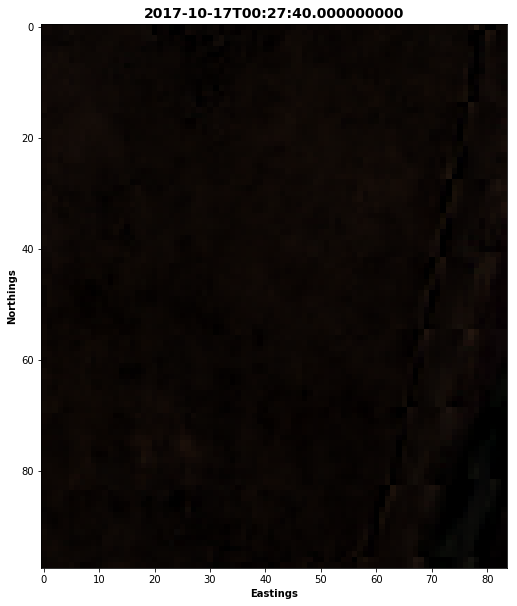

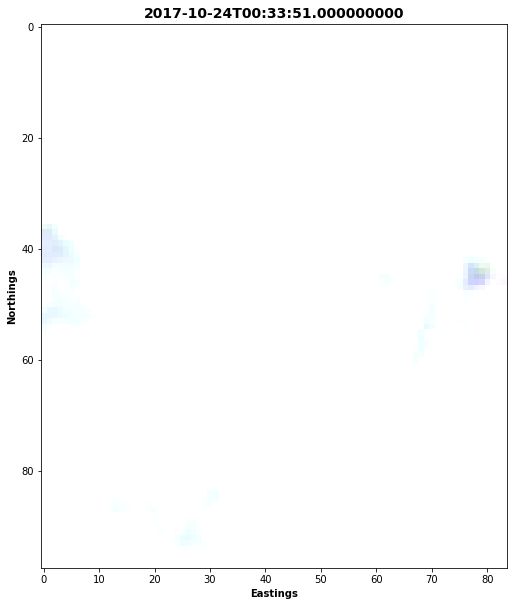

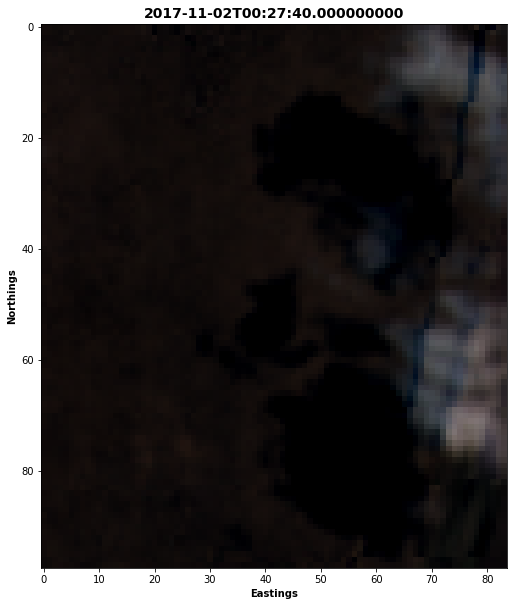

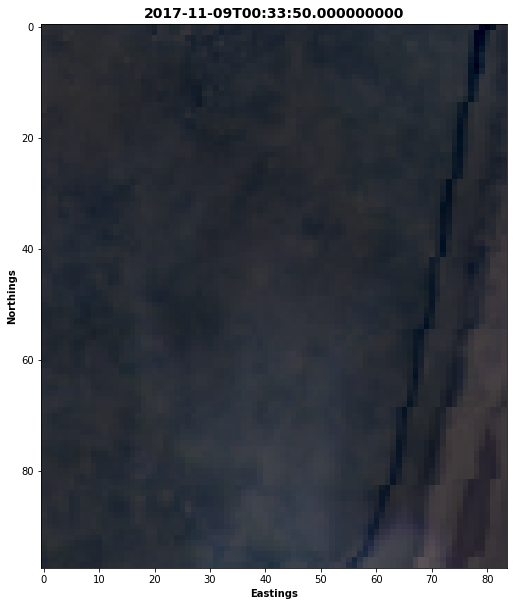

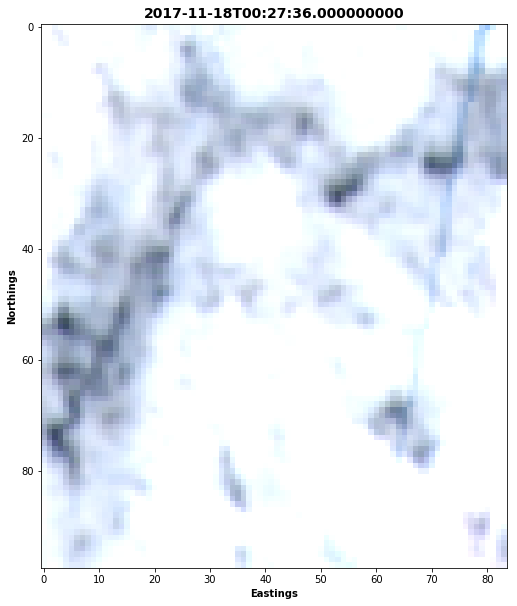

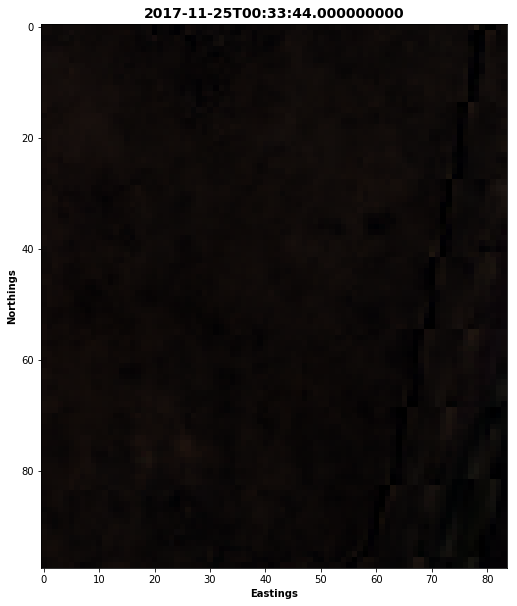

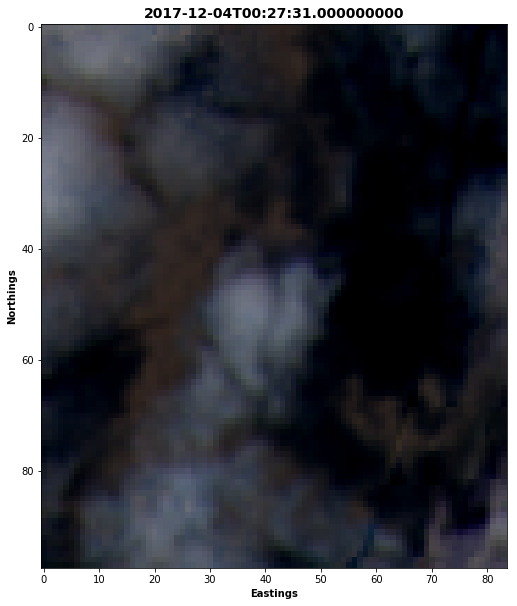

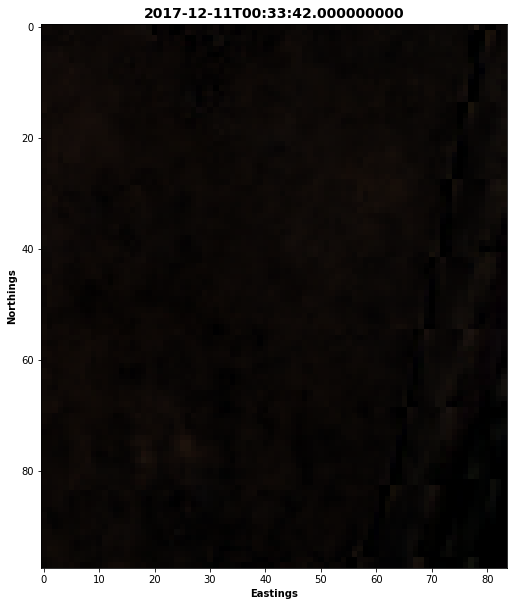

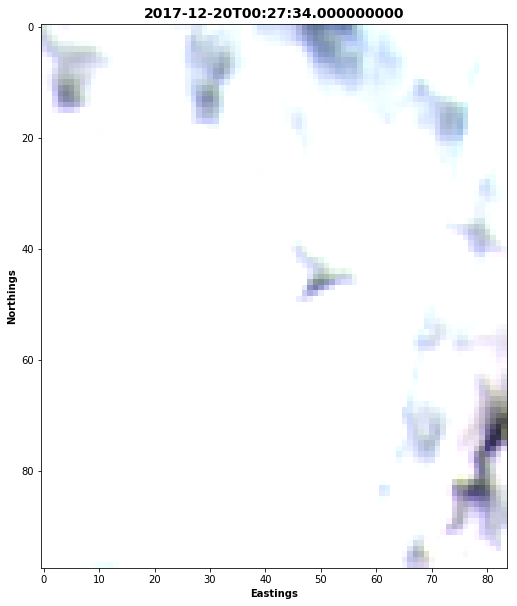

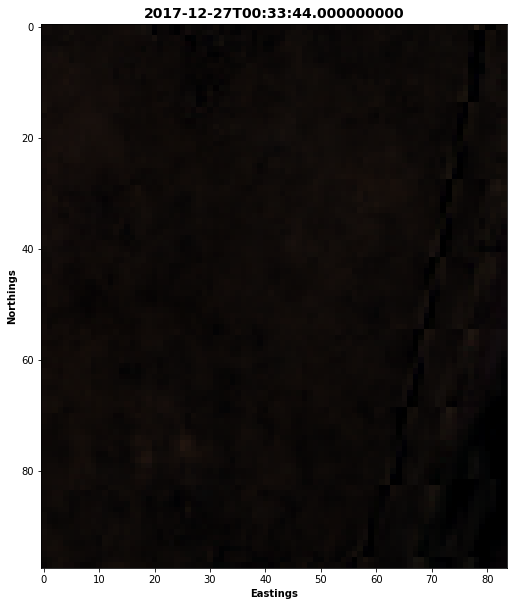

In [13]:
#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(11.5, 9.5))
#plt.tight_layout(pad=5.5, w_pad=4.5, h_pad=2.5)

for i in range(len(sat_array['time'])):
    DEAPlotting.three_band_image(diffo, bands = ['red', 'green', 'blue'], time = i, contrast_enhance=False)
